**Predmet:** Principi prezentacije i prepoznavanja oblika

**Student:** Pavle Rogan IT5/2020

**Tema:** Segmentacija

**Segmentacija** slike predstavlja podelu slike u smislene strukture tj. segmente i često je suštinski korak u analizi slike, predstavljanju objekta, vizuelizaciji, kao i mnogim drugim zadacima tokom računarske obrade fotografije.
**Cilj** segmentacije je da se pojednostavi i promeni prikaz slike u nešto što bi bilo smislenije i lakše za analizu. Tehnike za segmentaciju **lociraju objekte** koji se sastoje od piksela koji imaju nešto zajedničko. Najčešće to znači da su pikseli sa gotovo istim intenzitetom vrednosti grupisani zajedno, ili pikseli sa bojom istog koda.


Segmentacija je jedan od **najkritičnijih** zadataka u automatskoj analizi slike, jer će rezultati segmentacije uticati na sve naredne procese analize slike, kao što su reprezentacija i opis objekta, merenje odlika pa čak i zadataka višeg nivoa, kao što su klasifikacija objekta i interpretacija scene.

 Segmentacija fotografije svoju **primenu** pronalazi u mnogim oblastima: medicinska analiza fotografije, detekcija objekata (otkrivanje saobraćajnih znakova), obrada satelitskih snimaka, video nadzor, kontrola saobraćaja, kao i u ogromnom broju drugih oblasti.

**METODE SEGMENTACIJE**

Kada govorimo o tehnikama koje se primenjuju pri segmentaciji slika možemo izdvojiti dve najčešće i to su **tehnika izdvajanja regiona - semantička segmentacija**  i **tehnika pronalaženja ivica - segmentacija instance**  

Kod semantičke segmentacije svaki piksel pripada određenoj klasi (ili pozadini ili osobi), takođe svi pikseli koji pripradaju određenoj klasi su predstavljeni istom bojm (*Slika levo*).

Kod segmentacije instance takođe svaki piksel slike pripada određenoj klasi, međutim različiti objekti iste klase imaju različite boje (*Slika desno*).

<img src="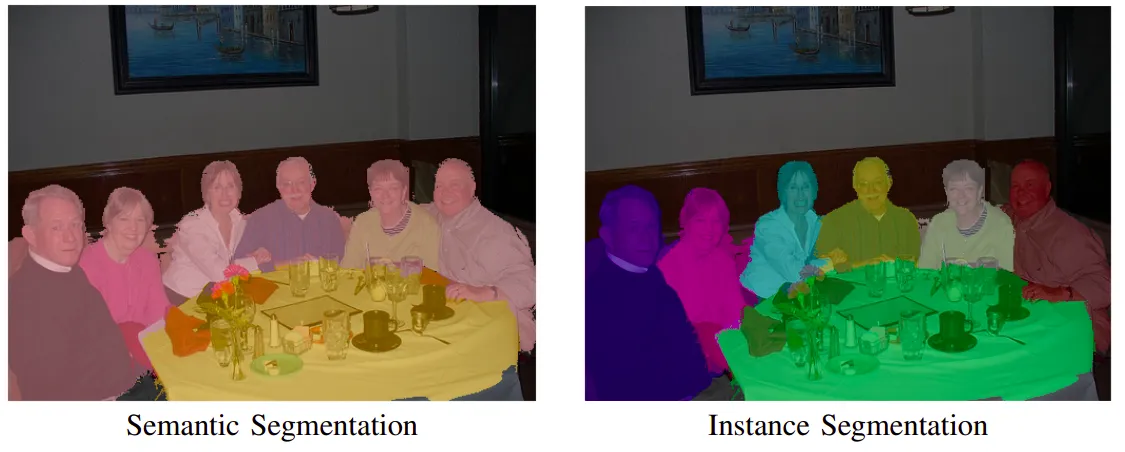
" alt="description">


U okviru projekta korišćena je **U-Net** kovoluciona neuronska mreža koja obezbeđuje brzu i preciznu semantičku segmentaciju slika.
Njena arhitektura može se posmatrati kao mreža enkodera koju prati mreža dekodera. Za razliku od klasifikacije gde je krajnji rezultat mreže jedina važna stvar, semantička segmentacija ne zahteva samo diskriminaciju na nivou piksela već i mehanizam za projektovanje diskriminativnih karakteristika naučenih u različitim fazama enkodera na prostor piksela.


Pored svoje efikasnosti, U-Net takođe ima prednost dostupnosti implementacija u popularnim bibliotekama za duboko učenje poput **TensorFlow-a i PyTorch-a**. To olakšava implementaciju, eksperimentisanje i prilagođavanje U-Net arhitekture specifičnim zahtevima i skupovima podataka.

U suštini, izbor U-Net arhitekture za segmentaciju u medicinskim slikama motivisan je njegovom sposobnošću da postigne visoku tačnost i preciznost u segmentaciji, kao i njegovom popularnošću u istraživačkoj zajednici. U budućnosti, nastavak istraživanja i razvoj novih metoda će dodatno unaprediti segmentaciju i omogućiti primenu u različitim situacijama.

Reference:

Ronneberger, O., Fischer, P., & Brox, T. (2015). U-Net: Convolutional networks for biomedical image segmentation. In International Conference on Medical Image Computing and Computer-Assisted Intervention (pp. 234-241). Springer

Shen, D., Wu, G., & Suk, H. I. (2017). Deep learning in medical image analysis. Annual review of biomedical engineering, 19, 221-248

**DATASET**

Set podataka korišćen u projektu predstavlja skup fotografija ultrazvuka nerava, sa realizovanim maskama koje će biti potrebne prilikom kreiranja modela. Zadatak je da se izvrši segmentacija nerava pod nazivom Brahijalni pleksus (BP).Nervi su ručno označeni na maskama, ali postoji i deo fotografija gde uopšte nervi nisu prisutni. U slučajevima kada nerv nije prisutan, algoritam ne bi trebalo da predviđa nikakve vrednosti piksela. Ovakva segmentacija bi konkretno mogla biti korisna medicinskim radnicima u različitim situacijama, najviše za aktivnosti analize i detekcije abnormalnosti kod pacijenata. Otežavajuća okolnost kod ovog seta podataka je ta što na UZ fotografijama nije lako uočiti nerv s obzirom na različite šumove i slične smetnje.

Dataset se sastoji iz trening i test fajlova.

**Train.zip** služi za treniranje modela, a u okviru tog fajla imamo dva foldera: **images i masks**. Kao što je prethodno u tekstu pomenuto, maske su ručno pravljene od strane stručnih lica gde su označeni nervi na ultrazvučnim fotografijama. Sve fotografije koje u sebi sadrže „mask“, predstavljaju ono što naš algoritam treba da pretpostavi. Suprotno tome, one fotografije koje nemaju „mask“ u svom nazivu, prolaziće kroz algoritam i nad njima se vrši predikcija.

Potrebno je dobro istrenirati model kako bi on što tačnije pretpostavio prisutnost/odsutnost nerava na drugim fotografijama. Na osnovu razlike fotografije UZ nerava i njegove odgovarajuće maske, izračunava se greška.

Drugi fajl koji se nalazi u setu podataka je **Test.zip** fajl, i on sadrži samo fotografije bez maski i koristi se za testiranje algoritma. Na kraju se u odnosu na predikcije i ostvarene rezultate računa uspešnost algoritma.

**Povezivanje na google drive i unzip podataka**

Sledeću liniju koda izvršavamo kako bi se omogućilo maunt Google Drive-a u virtualnu mašinu koja se koristi za izvršavanje koda

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!unzip '/content/gdrive/MyDrive/Ultrasound_segmentation.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/34_114_mask.tif   
  inflating: train/34_115.tif        
  inflating: train/34_115_mask.tif   
  inflating: train/34_116.tif        
  inflating: train/34_116_mask.tif   
  inflating: train/34_117.tif        
  inflating: train/34_117_mask.tif   
  inflating: train/34_118.tif        
  inflating: train/34_118_mask.tif   
  inflating: train/34_119.tif        
  inflating: train/34_119_mask.tif   
  inflating: train/34_11_mask.tif    
  inflating: train/34_12.tif         
  inflating: train/34_12_mask.tif    
  inflating: train/34_13.tif         
  inflating: train/34_13_mask.tif    
  inflating: train/34_14.tif         
  inflating: train/34_14_mask.tif    
  inflating: train/34_15.tif         
  inflating: train/34_15_mask.tif    
  inflating: train/34_16.tif         
  inflating: train/34_16_mask.tif    
  inflating: train/34_17.tif         
  inflating: train/34_17_mask.tif    
  inflating: train/34_18.tif         


Instalira se segmentation_models_pytorch biblioteka sa neuronskim mrežama koja se koristi za segmentaciju fotografija, zasnovana na biblioteci PyTorch. Ova biblioteka se koristi za deep learning aplikacije koje koriste GPU ili CPU.

In [5]:
!pip install git+https://github.com/qubvel/segmentation_models.pytorch

  Cloning https://github.com/qubvel/segmentation_models.pytorch to /tmp/pip-req-build-2rqrkqah
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/segmentation_models.pytorch /tmp/pip-req-build-2rqrkqah
  Resolved https://github.com/qubvel/segmentation_models.pytorch to commit 6db76a1106426ac5b55f39fba68168f3bccae7f8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 89.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

Early stopping je oblik regularizacije koji prekida proces treninga neuronske mreže pre nego što dostigne maksimalni broj epoha ili iteracija. Ideja je pratiti performanse mreže na validacionom skupu i zaustaviti obučavanje kada se greška na validacionom skupu počne povećavati ili prestane da se poboljšava. Tako takodje sprečavamo da se neuronska mreža previše prilagodi podacima tokom treninga.

In [6]:
!git clone https://github.com/Bjarten/early-stopping-pytorch.git esp

Cloning into 'esp'...
remote: Enumerating objects: 92, done.
remote: Total 92 (delta 0), reused 0 (delta 0), pack-reused 92
Receiving objects: 100% (92/92), 533.89 KiB | 2.08 MiB/s, done.
Resolving deltas: 100% (39/39), done.


U sledećem koraku se importuju različite biblioteke i paketi, i inicijalizuju neophodni resursi za rad sa neuronskim mrežama u PyTorch-u. Evo kratkog opisa svake biblioteke/paketa koja se koristi:

os: Ova biblioteka omogućava pristup operativnom sistemu, kao što su manipulacija fajlovima i direktorijumima.

numpy as np: NumPy je popularna biblioteka u Pythonu za rad sa numeričkim podacima. Često se koristi za manipulaciju i analizu podataka.

pandas as pd: Pandas je još jedna popularna biblioteka za manipulaciju podacima, posebno strukturiranim podacima, kao što su tabelarni podaci.

matplotlib.pyplot as plt: Matplotlib je biblioteka za vizualizaciju podataka. pyplotpruža funkcije za kreiranje grafika i dijagrama.

segmentation_models_pytorch as smp: Ovo je paket koji pruža implementacije različitih modela za segmentaciju slika u PyTorch-u.

from esp.pytorchtools import EarlyStopping: Ovde se koristi modul za rani prekid (early stopping) koji je uvezen iz datoteke pytorchtools koja se nalazi unutar esp paketa.

torch: PyTorch je biblioteka otvorenog koda za mašinsko učenje i duboko učenje.

torch.nn as nn: Ovde se uvozi modul nn iz PyTorch-a, koji sadrži alate za definisanje neuronskih mreža.

torch.optim as optim: Ovaj modul pruža različite optimizatore koji se koriste za optimizaciju parametara neuronskih mreža tokom obučavanja.

from torch.optim import lr_scheduler: Ovde se uvozi modul koji sadrži razne algoritme za prilagođavanje stopa učenja tokom obučavanja neuronskih mreža.

from torch.utils.data import Dataset, DataLoader: Ovde se uvoze klase Dataset i DataLoader koje se koriste za rad sa podacima tokom obučavanja neuronskih mreža.

import torchvision: Ova biblioteka pruža popularne setove podataka, arhitekture modela i transformacije slika koje se često koriste u računarskom vidu.

from torchvision import transforms: Ovde se uvozi modul za transformaciju slika koji se koristi za obradu i pripremu podataka za obučavanje.

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import segmentation_models_pytorch as smp
from esp.pytorchtools import EarlyStopping
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms
from PIL import Image
import pickle

import segmentation_models_pytorch.utils as smpu
from tqdm.notebook import tqdm

**Istraživanje podataka započinjemo pregledom train_mask.csv fajla.**
Nakon izvršavanja ovog koda, promenljiva train_mask će sadržati podatke iz datoteke, obično u obliku DataFrame-a, jer se koristi pd.read_csv funkcija koja se koristi za čitanje CSV datoteka u pandas DataFrame.

In [8]:
train_mask = pd.read_csv("train_masks.csv")

Prikaz prvih nekoliko redova omogućava uvid u strukturu podataka i pomaže u razumevanju kako su podaci organizovani.

In [9]:
#prikaz prvih 5 linija
train_mask.head(5)


,subject,img,pixels
0,1,1,168153 9 168570 15 168984 22 169401 26 169818 ...
1,1,2,96346 7 96762 16 97179 27 97595 35 98012 40 98...
2,1,3,121957 2 122365 26 122784 28 123202 31 123618 ...
3,1,4,110980 9 111393 21 111810 33 112228 43 112647 ...
4,1,5,NaN


In [10]:
train_mask.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5635 entries, 0 to 5634
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  5635 non-null   int64 
 1   img      5635 non-null   int64 
 2   pixels   2323 non-null   object
dtypes: int64(2), object(1)
memory usage: 132.2+ KB


Fotografije UZ nerava koje nemaju masku znači da ne sadrže nerve. To je veoma bitno, stoga u narednom koraku razdvajamo one fotografije koje imaju i koje nemaju, te brojimo kako bismo videli koji je odnos u modelu. Odnos prikazujemo vizuelnim prikazom upotrebom matplotlib biblioteke.

Text(0, 0.5, 'Count')

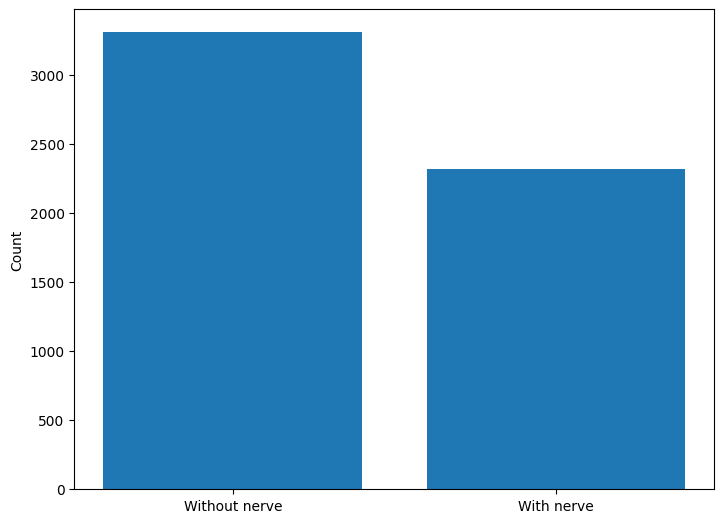

In [11]:
with_nerve = (train_mask['pixels'][train_mask['pixels']!= 'NaN'].count())
without_nerve = (train_mask['img'].count() - with_nerve)

plot = plt.figure()
ax = plot.add_axes([0,0,1,1])
x = ['Without nerve', 'With nerve']
labels = [without_nerve, with_nerve]
ax.bar(x, labels)
ax.set_facecolor('WHITE')
plt.ylabel("Count")


Posmatranjem grafika možemo primetiti da je broj fotografija koje nemaju u sebi nerv veći za oko **900** u odnosu na one koje imaju.



Kako bi naš model bio precizan, moramo da posmatramo validacione parametre. Zato koristimo prethodno ubačenu biblioteku EarlyStopping, kako bismo pratili **validation loss**.

Validation loss (validacioni gubitak) je metrika koja se koristi tokom obučavanja modela mašinskog učenja, posebno neuronskih mreža, kako bi se procenila njegova performansa na podacima koje nije video tokom obučavanja, tj. na validacionom skupu podataka.

Takodje potrebno je iskoristiti pickle modul koji izvršava serijalizaciju i deserijalizaciju python i serijalizuje objekat pre nego što ga upiše u datoteku.U kontekstu treniranja neuronskih mreža, može se koristiti za čuvanje modela nakon obučavanja kako bi se kasnije koristio za predikcije ili evaluaciju, ili kako bi se nastavilo sa obučavanjem bez gubitka prethodnih težina i parametara modela.

Kreiramo funkciju save_checkpoiunt. Ova funkcija se koristi za čuvanje modela kada se desi smanjenje validacionog gubitka tokom obučavanja.


In [12]:
def save_checkpoint(self, val_loss, model):
    import pickle
    if self.verbose:
        self.trace_func(f'Val loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
    with open(self.path, 'wb') as f:
        pickle.dump(model, f)
    self.val_loss_min = val_loss

Sledeci red koda postavlja funkciju save_checkpoint, koju smo prethodno definisali, kao metod klase EarlyStopping. Time se omogućava da se ova funkcija koristi kao metod instance EarlyStopping objekta, što znači da se može direktno pozvati nad objektom EarlyStopping kako bi se sačuvao model kada se desi smanjenje validacionog gubitka tokom obučavanja.

In [13]:
EarlyStopping.save_checkpoint = save_checkpoint

U sledećem koraku učitana je jenda random slika iz seta za trening, učitana je i maska koja odgovara toj fotografiji, a na trećem grafikonu je označena upravo gde ta maska pronalazi nerv.


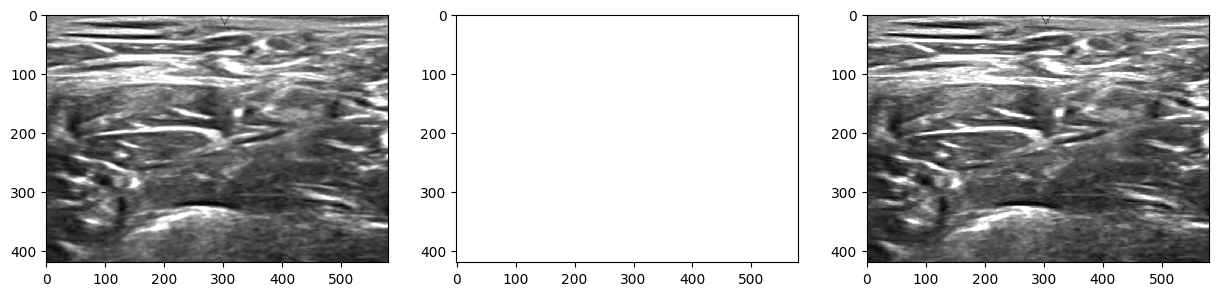

In [14]:
import random

random_img_index = random.randint(1, 30)

img_filename = f"train/{random_img_index}_1.tif"
mask_filename = f"train/{random_img_index}_1_mask.tif"

img = np.array(Image.open(img_filename))
img_mask = np.array(Image.open(mask_filename))
img_mask = np.ma.masked_where(img_mask == 0, img_mask)

fig, ax = plt.subplots(1, 3, figsize=(15, 15))

ax[0].imshow(img, cmap="gray")
ax[1].imshow(img_mask, cmap="summer")
ax[2].imshow(img, cmap="gray", interpolation="none")
ax[2].imshow(img_mask, cmap="summer", interpolation="none", alpha=0.6)

plt.show()

U narednom koraku kreiramo funkciju create_csv.

Ova funkcija create_csv prolazi kroz datoteke u datoteci folder_path i generiše CSV datoteku output_csv_path koja sadrži informacije o imenima slika i njihovim odgovarajućim maskama. Maskirane datoteke se prepoznaju na osnovu ključne reči maskS u imenu datoteke, a informacije se dodaju ili ažuriraju u CSV datoteci.







In [15]:
def create_csv(folder_path, output_csv_path):
    for file_name in os.listdir(folder_path):
        if 'mask' in file_name:
            img = file_name.replace('_mask', '')
            data = pd.DataFrame([img], index=['img']).transpose()
            data.insert(0, 'mask', file_name)
            if not os.path.exists(output_csv_path):
                data.to_csv(output_csv_path, header=True, index=False)
            else:
                data.to_csv(output_csv_path, mode='a', header=False, index=False)

# Example usage:
create_csv("train", "train_img_mask_pairs.csv")

In [16]:
train_data = pd.read_csv("train_img_mask_pairs.csv")

In [17]:
train_data.head(5)

,mask,img
0,3_53_mask.tif,3_53.tif
1,12_103_mask.tif,12_103.tif
2,31_65_mask.tif,31_65.tif
3,31_89_mask.tif,31_89.tif
4,42_89_mask.tif,42_89.tif


In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5635 entries, 0 to 5634
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mask    5635 non-null   object
 1   img     5635 non-null   object
dtypes: object(2)
memory usage: 88.2+ KB


U narednom koraku definisana je klasa CustomDataset, koja se koristi za stvaranje skupa podataka za model mašinskog učenja.

In [19]:
class CustomDataset(Dataset):
    def __init__(self, df, root_dir, transform=None):
        self.df = df
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        mask = Image.open(os.path.join(self.root_dir, self.df.iloc[idx, 0]))
        image = Image.open(os.path.join(self.root_dir, self.df.iloc[idx, 1]))

        if self.transform:
            return self.transform(image), self.transform(mask)

        return image, mask

In [20]:
train_sample = CustomDataset(df=train_data, root_dir='train')

Sledi prikaz nekoliko primera maski i fotografija UZ-a

In [21]:
def plot_samples(data, n_col, n_row=2):
    fig = plt.figure(figsize=(20, 5))

    for i in range(1, n_col + 1):
        img_ax = fig.add_subplot(n_row, n_col, i)
        msk_ax = fig.add_subplot(n_row, n_col, i + n_col)

        img_ax.imshow(data[i-1][0], cmap="gray")
        msk_ax.imshow(data[i-1][1], cmap="gray")

    fig.show()

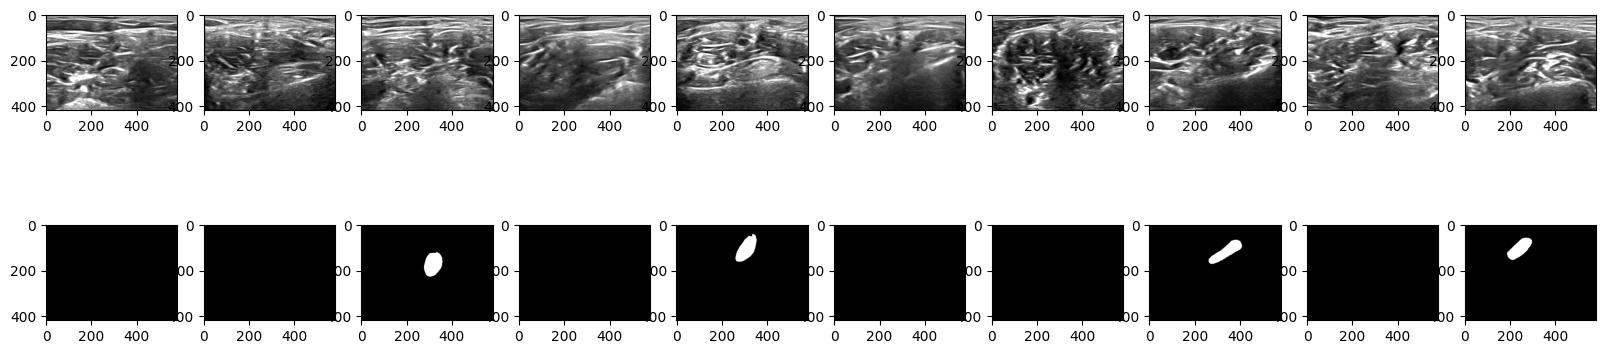

In [22]:
plot_samples(data=train_sample, n_col = 10)

**Kreiranje modela**

---



Za kreiranju modela koristim prethodno instaliranu **segmentation_model_pytorch** biblioteku, odnoso njene delove.

Podešavanje parametar apotrebnih za korišćenje SMP biblioteke

Parametri U-NET mreze:

*   encoder_name (naziv klasifikacionog modela koji se koristi kao ekstraktor karakteristika za izgradnju segmentacionog modela)
*   encoder_weights (imagenet (pre-training na ImageNet-u))
*   encoder_weights (imagenet (pre-training na ImageNet-u))
*   in_channels (broj ulaznih kanala za model)
*   classes (broj klasa za izlaz)
*   activation (funkcija aktivacije koja će se primeniti nakon konačne konvolucije)

Kreiramo U-net model sa datim parametrima.



In [23]:
model = smp.Unet(
    encoder_name='vgg11_bn',
    encoder_weights='imagenet',
    in_channels=1,
    classes=1,
    activation='sigmoid'
)

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Downloading: "https://download.pytorch.org/models/vgg11_bn-6002323d.pth" to /root/.cache/torch/hub/checkpoints/vgg11_bn-6002323d.pth
100%|██████████| 507M/507M [00:03<00:00, 158MB/s]


U sledećem koraku su linije koda koje se koriste za postavljanje funkcije gubitka, metrika, optimizatora i scheduler-a prilikom obuke modela za segmentaciju slika.

In [24]:
loss = smpu.losses.DiceLoss()
metrics = [smpu.metrics.IoU()]
optimizer = torch.optim.Adam
scheduler = lr_scheduler.StepLR

**DiceLoss** je popularna funkcija gubitka koja se često koristi u zadacima segmentacije slika. Ona meri preklapanje (sličnost) između predviđenih i stvarnih maski. Veće vrednosti Dice koeficijenta ukazuju na bolje preklapanje između maski. Dice Loss je funkcija gubitka koja se koristi tokom obuke modela za segmentaciju slika.

**IoU** (Intersection over Union) je metrika koja meri koliko se predviđene maske preklapaju sa stvarnim maskama. Veće vrednosti IoU-a ukazuju na bolje rezultate. U ovom slučaju, koristi se lista sa jednim elementom IoU, što znači da će se tokom obuke meriti samo IoU metrika. IoU je metrika koja se koristi za evaluaciju performansi modela nakon obuke.  Što je IoU bliži 1, znači da je predikcija bolja, a što je bliži 0, znači da je model lošiji.

**Adam optimizator** je popularan algoritam za optimizaciju u dubokom učenju. On adaptivno prilagođava stopu učenja za svaki parametar na osnovu procene prvog i drugog momenta gradijenta. Ovo omogućava bržu konvergenciju i bolje rezultate nego tradicionalni optimizatori kao što je SGD.

**StepLR** je scheduler koji smanjuje stopu učenja nakon svake epohe prema zadatom koraku. Ovo može pomoći u postizanju stabilne konvergencije i izbegavanju preteranog prilagođavanja (overfitting-a).


Funkcija **split_data** se koristi za podelu pandas DataFrame-a na dva podskupa - jedan za trening i jedan za validaciju ili testiranje. Ova funkcija je korisna kada se želi izdvojiti određeni procenat podataka za trening modela, dok se preostali podaci koriste za validaciju ili testiranje.

In [25]:
def split_data(df):
    df_1 = df.sample(frac=0.8)
    return df_1, df.drop(df_1.index)

Takodje je potrebno da se izvrše transformacije inicijalnih fortografija.

Ove transformacije su često potrebne prilikom pripreme podataka za trening modela, kako bi se osiguralo da ulazni podaci odgovaraju očekivanom formatu i veličini za određeni model ili algoritam obuke. Kombinovanje transformacija u sekvencu pomoću transforms.Compose omogućava jednostavnu primenu ovih transformacija na ulazne podatke tokom obuke.

In [26]:
image_transforms = transforms.Compose([

    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()

])

Sledeć korak je **TRENIRANJE MODELA**

---



Sledeća funkcija train je odgovorna za obuku modela za segmentaciju slika.

*   Funkcija postavlja ključne parametre obuke kao što su optimizer, funkcija gubitka, metrike za procenu performansi, stopa učenja, veličina grupa, broj epoha i parametri za early stopping i scheduler.
*   Podela podataka na trening i validacioni set se vrši korišćenjem funkcije split_data, a transformacije se primenjuju na ulazne podatke ako je to potrebno.
*   U petlji za obuku se iterira kroz epohe, za svaku epohu se izvršava trening i validacija, a takođe se prate i logovi o performansama modela. Early stopping se koristi kako bi se sprečilo preterano obučavanje modela, a nakon svake epohe se osvežava i scheduler ako je postavljen. Na kraju se vraćaju logovi o treningu i validaciji.



In [27]:
def train(model, train_df, train_dir, optimizer, loss, metrics,
          learning_rate=0.01, batch_size=20, epochs=10, patience=3,
          scheduler=None, step_size=5, gamma=0.1, device='cpu', transform=None):

    early_stopping = EarlyStopping(patience, path='best_model.pkl', verbose=True)
    optimizer = optimizer(model.parameters(), learning_rate)

    if scheduler:
        scheduler = scheduler(optimizer, step_size, gamma)

    train_epoch = smp.utils.train.TrainEpoch(
        model, loss, metrics, optimizer, device, verbose=True
    )

    valid_epoch = smp.utils.train.ValidEpoch(
        model, loss, metrics, device, verbose=True
    )

    train_logs, valid_logs = [], []

    for epoch in range(epochs):
        train_dataframe, val_dataframe = split_data(train_df)

        train_dataset = CustomDataset(train_dataframe, train_dir, transform=transform)

        valid_dataset = CustomDataset(val_dataframe, train_dir, transform=transform)

        train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                                   batch_size=batch_size,
                                                   shuffle=True)

        valid_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                                   batch_size=batch_size,
                                                   shuffle=False)

        print(f'\nEpoch: {epoch+1}/{epochs}')

        train_log = train_epoch.run(train_loader)
        valid_log = valid_epoch.run(valid_loader)

        train_logs.append(train_log)
        valid_logs.append(valid_log)

        early_stopping(valid_log[loss.__name__], model)

        if early_stopping.early_stop:
            print("Early stopping")
            break

        if scheduler:
            scheduler.step()

    return train_logs, valid_logs

In [28]:
result = train(model=model,
            train_df=train_data,
            train_dir='train',
            optimizer=optimizer,
            loss=loss,
            learning_rate=0.01,
            metrics=metrics,
            batch_size=20,
            epochs=20,
            scheduler=scheduler,
            step_size=10,
            patience=3,
            device=DEVICE,
            transform=image_transforms)


Epoch: 1/20
valid: 100%|██████████| 226/226 [00:57<00:00,  3.96it/s, dice_loss - 0.4673, iou_score - 0.3684]
Val loss decreased (inf --> 0.467260).  Saving model ...

Epoch: 2/20
valid: 100%|██████████| 226/226 [00:57<00:00,  3.96it/s, dice_loss - 0.4611, iou_score - 0.3764]
Val loss decreased (0.467260 --> 0.461124).  Saving model ...

Epoch: 3/20
valid: 100%|██████████| 226/226 [00:57<00:00,  3.95it/s, dice_loss - 0.4408, iou_score - 0.3934]
Val loss decreased (0.461124 --> 0.440842).  Saving model ...

Epoch: 4/20
valid: 100%|██████████| 226/226 [00:57<00:00,  3.92it/s, dice_loss - 0.4037, iou_score - 0.4314]
Val loss decreased (0.440842 --> 0.403669).  Saving model ...

Epoch: 5/20
valid: 100%|██████████| 226/226 [00:57<00:00,  3.90it/s, dice_loss - 0.3677, iou_score - 0.4677]
Val loss decreased (0.403669 --> 0.367744).  Saving model ...

Epoch: 6/20
valid: 100%|██████████| 226/226 [00:57<00:00,  3.93it/s, dice_loss - 0.3957, iou_score - 0.4399]
EarlyStopping counter: 1 out of 3



**REZULTATI**

---



In [29]:
with open('results.pkl', 'wb') as f:
    pickle.dump(result, f)

with open('best_model.pkl', 'rb') as f:
    best_model = pickle.load(f)

In [30]:
train_logs_df = pd.DataFrame(result[0])
valid_logs_df = pd.DataFrame(result[1])

res_dict = {'train': train_logs_df, 'valid': valid_logs_df}

In [31]:
def plot_result(df_dict, title, criteria, xlab, ylab, colors=['m', 'g'],
                 legend_loc='best', figsize=(12, 8), fontsize=14):
    fig, ax = plt.subplots(figsize=figsize)

    for i, key in enumerate(df_dict):
        ax.plot(df_dict[key].index, df_dict[key][criteria], color=colors[i], linestyle='--', marker='o', label=key)

    ax.set_xlabel(xlab, fontsize=fontsize)
    ax.set_ylabel(ylab, fontsize=fontsize)
    ax.set_title(title, fontsize=fontsize)
    ax.legend(loc=legend_loc, fontsize=fontsize)
    ax.grid(True)

    plt.show()

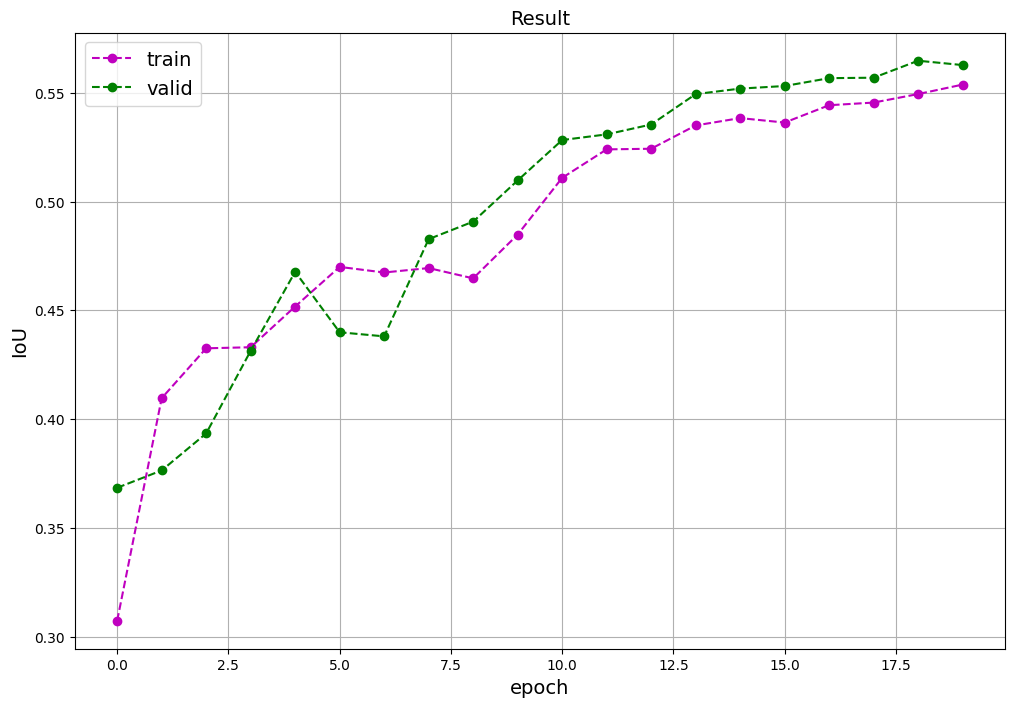

In [32]:
plot_result(df_dict=res_dict, title='Result', criteria='iou_score', xlab='epoch', ylab='IoU')

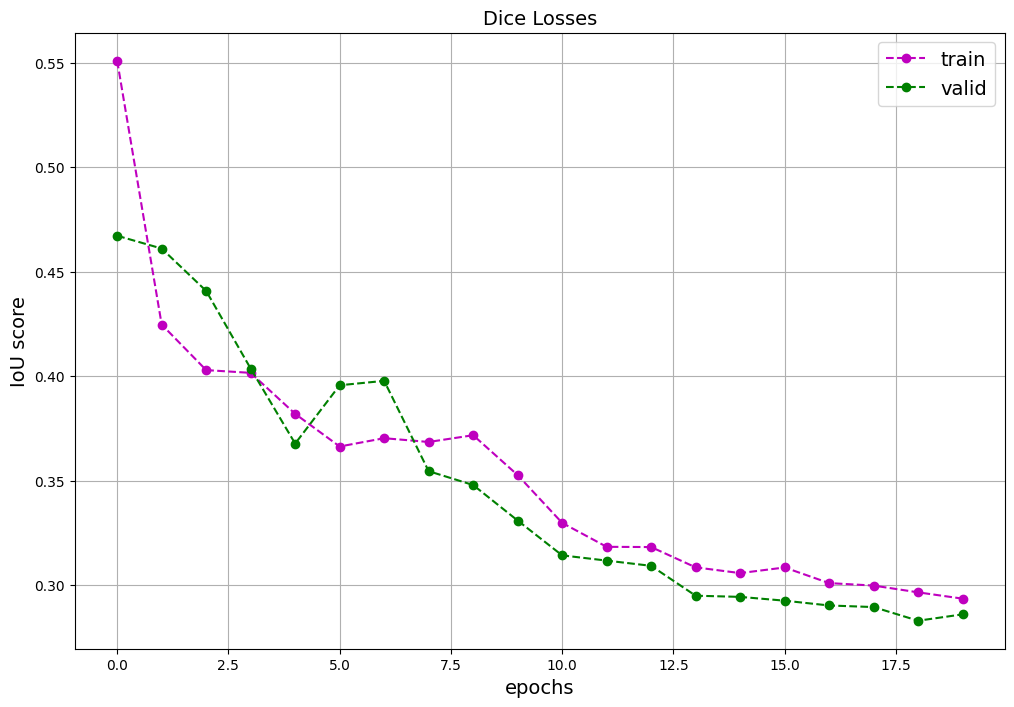

In [33]:
plot_result(df_dict=res_dict, title='Dice Losses', criteria='dice_loss', xlab='epochs', ylab='IoU score')

**Testiranje modela**

---



Funkcija rle_encoding(x) vrši RLE kodiranje binarne maske. Ova funkcija prima binarnu masku kao ulaz i vraća niz parova koji predstavljaju dužine intervala (run-length encoding) gde se nalazi nerv. Ovo je oblik kodiranja koji se često koristi u konkurencijama za segmentaciju objekata kako bi se kompaktno predstavili rezultati

In [91]:
def rle_encoding(x):
    dots = np.where(x.T.flatten()==1)[0]
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b+1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths

In [92]:
imgs = [file for file in os.listdir('test')]
imgs = sorted(imgs, key=lambda s: int(s.split('.')[0]))

In [93]:
imgs[0]

'1.tif'

Kreiramo novi csv fajl u okviru kog će se nalaziti podaci o tome da li se na fotografiji nalazi nerv ili ne.

In [94]:
def create_csv_submission(model, data_path, img_list, out_path):
    submission_df = pd.DataFrame(columns=['img', 'pixels'])
    model.to(DEVICE)
    model.eval()

    for i, img in enumerate(tqdm(img_list)):
        x = Image.open(os.path.join(data_path, img))

        x = image_transforms(x)

        x = x.unsqueeze(0).to(DEVICE)
        pred_mask = model.predict(x)

        pred_mask = pred_mask.cpu()
        pred_mask = transforms.Resize(size=(420, 580))(pred_mask)

        encoding = rle_encoding(pred_mask)

        pixels = ' '.join(map(str, encoding))
        submission_df.loc[i] = [str(i+1), pixels]

    submission_df.to_csv(out_path, index=False)

In [96]:
create_csv_submission(model=model,
                      data_path='test',
                      img_list=imgs,
                      out_path='submission2.csv')

  0%|          | 0/5508 [00:00<?, ?it/s]

In [97]:
test_res = pd.read_csv("submission2.csv")

In [98]:
test_res.head(20)

,img,pixels
0,1,109310 19 109730 19 110149 21 110563 28 110982...
1,2,107269 13 107688 15 108107 19 108524 38 108943...
2,3,110999 3 111412 14 111832 15 112250 18 112667 ...
3,4,NaN
4,5,100530 8 100950 10 101370 10 101788 16 102207 ...
5,6,NaN
6,7,NaN
7,8,NaN
8,9,103073 12 103492 14 103907 26 104326 27 104745...
9,10,NaN
